In [174]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

## Отображения

Определяем два отображения для исследования:

1. **f(x) = r·x·(1-x)** — парабола (логистическое отображение)
2. **g(x) = r·x·(1-x²)** — кубическая кривая

In [175]:
def f(x, r) -> float:
    """
    Базовое логистическое отображение
    
    Параметры:
    x : Значение переменной x
    r : Значение переменной r
    """
    return r * x * (1 - x)

def g(x, r) -> float:
    """
    Отображение для N=1: g(x) = r * x * (1 - x²)
    
    Параметры:
    x : Значение переменной x
    r : Значение переменной r
    """

    return r * x * (1 - x**2)

## Поиск длины цикла

Функция `find_cycle_length` находит **период цикла** для заданного параметра r.

**Алгоритм:**
1. Делаем 10000 итераций — система выходит на устойчивый цикл
2. Запоминаем текущую точку `x_start`
3. Продолжаем итерации и считаем, через сколько шагов вернёмся в `x_start`

**Возвращает:** длину цикла m, или -1 если цикл слишком длинный 

In [176]:
def cycle_lenght(func, r, x0=0.5) -> int:
    """
    Находим длину цикла для данного r
    
    Параметры:
    func : Функция отображения
    r : Значение переменной r
    x0 : Начальное значение переменной x, по умолчанию 0.5
    """
    x = x0
    
    for _ in range(10000):
        x = func(x, r)
    
    x_start = x
    
    for period in range(1, 300):
        x = func(x, r)
        if abs(x - x_start) < 1e-9:
            return period
    
    return -1

## Лестница Ламерея

Функция `plot_lamerey` строит **графическую визуализацию** лестницы Ламерея.

**Алгоритм построения:**
1. Рисуем кривую y = f(x) и диагональ y = x
2. Из точки (x0, 0) идём **вверх** до пересечения с f(x)
3. Из этой точки идём **горизонтально** до линии y = x
4. Повторяем — получается "лестница"


In [177]:
def ladder_lamerey(ax, func, r, x0, n, title) -> None:
    """
    Строит лестницу Ламерея для заданного отображения.
    
    Параметры:
    - ax: объект matplotlib для рисования
    - func: отображение f(x, r)
    - r: параметр отображения
    - x0: начальная точка
    - n: количество шагов лестницы
    - title: заголовок графика
    """
    
    x_coords = np.linspace(0, 1, 500)
    y_coords = [func(xi, r) for xi in x_coords]
    ax.plot(x_coords, y_coords, 'b-', linewidth=2, label=f'f(x), r={r}')
    
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='y = x')
    
    x = x0
    x_ladder = [x]
    y_ladder = [0]
    
    for _ in range(n):
        x_N = func(x, r)
        
        x_ladder.append(x)
        y_ladder.append(x_N)
        
        x_ladder.append(x_N)
        y_ladder.append(x_N)
        
        x = x_N
    
    ax.plot(x_ladder, y_ladder, 'r-', linewidth=1.5, label='Лестница Ламерея')
    ax.plot(x0, 0, 'go', markersize=8, label=f'Начало x₀={x0}')
    
    ax.set_xlabel('xₙ', fontsize=12)
    ax.set_ylabel('xₙ₊₁', fontsize=12)
    ax.set_title(title, fontsize=11)
    ax.legend(fontsize=9)
    ax.grid(True, alpha = 0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

## Графики f(x) и g(x)
Построение двух графиков **f(x) = r·x·(1-x)** и **g(x) = r·x·(1-x²)** для сравнения, r = 2.5 для g(x) и r = 3.2 для f(x)

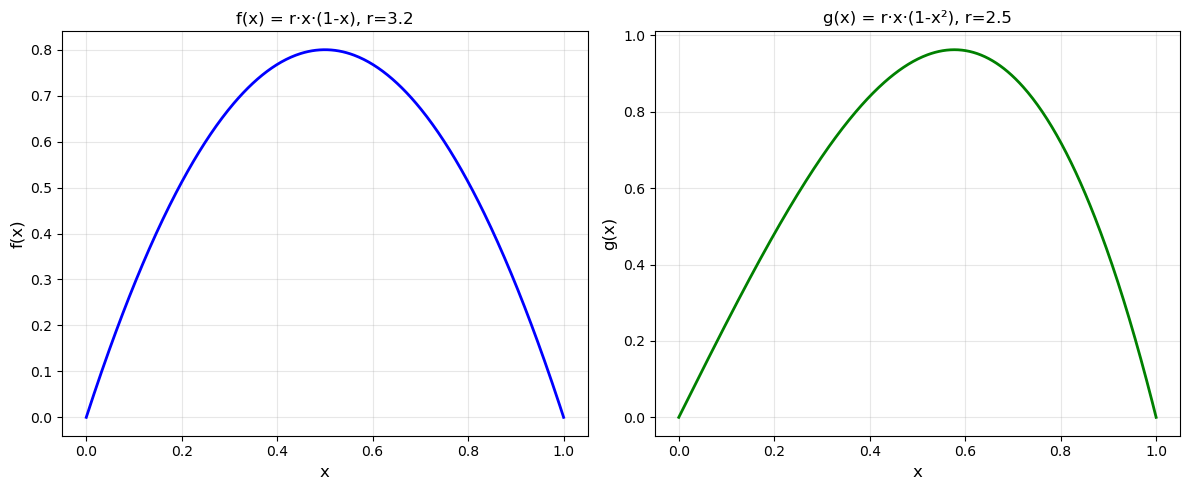

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x = np.linspace(0, 1, 500)
r_f = 3.2
r_g = 2.5  

y_f = [f(xi, r_f) for xi in x]
axes[0].plot(x, y_f, 'b-', linewidth=2)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title(f'f(x) = r·x·(1-x), r={r_f}', fontsize=12)
axes[0].grid(True, alpha=0.3)

y_g = [g(xi, r_g) for xi in x]
axes[1].plot(x, y_g, 'g-', linewidth=2)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('g(x)', fontsize=12)
axes[1].set_title(f'g(x) = r·x·(1-x²), r={r_g}', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Сравнение отображений f(x) и g(x)

Сравниваем зависимость длины цикла от параметра r для обоих отображений:
- **f(x) = r·x·(1-x)** — диапазон r ∈ (3, 3.57)
- **g(x) = r·x·(1-x²)** — диапазон r ∈ [0, 2.6]

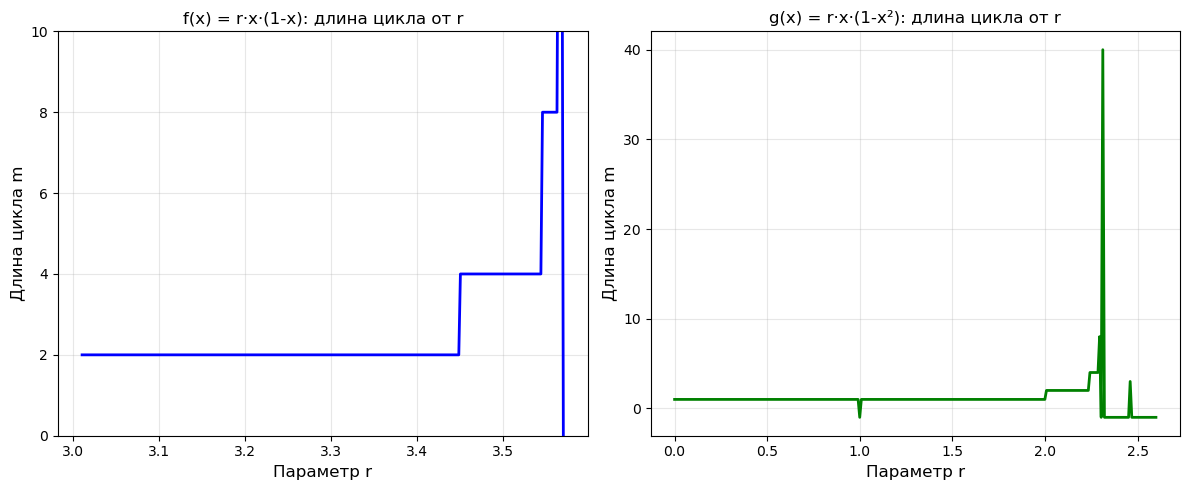

In [179]:
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

r_infinity = 3.5699456  
r_values = np.linspace(3.01, r_infinity, 300)
results = []
m_current = 0

for r in r_values:
    m = cycle_lenght(f, r)
    results.append((r, m))
    
    if m != -1 and m > m_current:
        m_current = m

ax1 = axes2[0]
r_plot = [res[0] for res in results]
m_plot = [res[1] for res in results]
ax1.plot(r_plot, m_plot, 'b-', linewidth=2)
ax1.set_xlabel('Параметр r', fontsize=12)
ax1.set_ylabel('Длина цикла m', fontsize=12)
ax1.set_title('f(x) = r·x·(1-x): длина цикла от r', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 10)

ax2 = axes2[1]
r_max_g = 3 * np.sqrt(3) / 2  
r_values_g = np.linspace(0, r_max_g, 300)
results_g = []

for r in r_values_g:
    m = cycle_lenght(g, r)
    results_g.append((r, m))

r_plot_g = [res[0] for res in results_g]
m_plot_g = [res[1] for res in results_g]
ax2.plot(r_plot_g, m_plot_g, 'g-', linewidth=2)
ax2.set_xlabel('Параметр r', fontsize=12)
ax2.set_ylabel('Длина цикла m', fontsize=12)
ax2.set_title('g(x) = r·x·(1-x²): длина цикла от r', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Графики: Лестницы Ламерея для разных циклов

Строим 4 лестницы для разных значений r, чтобы увидеть циклы длины 2, 4, 8, 16.

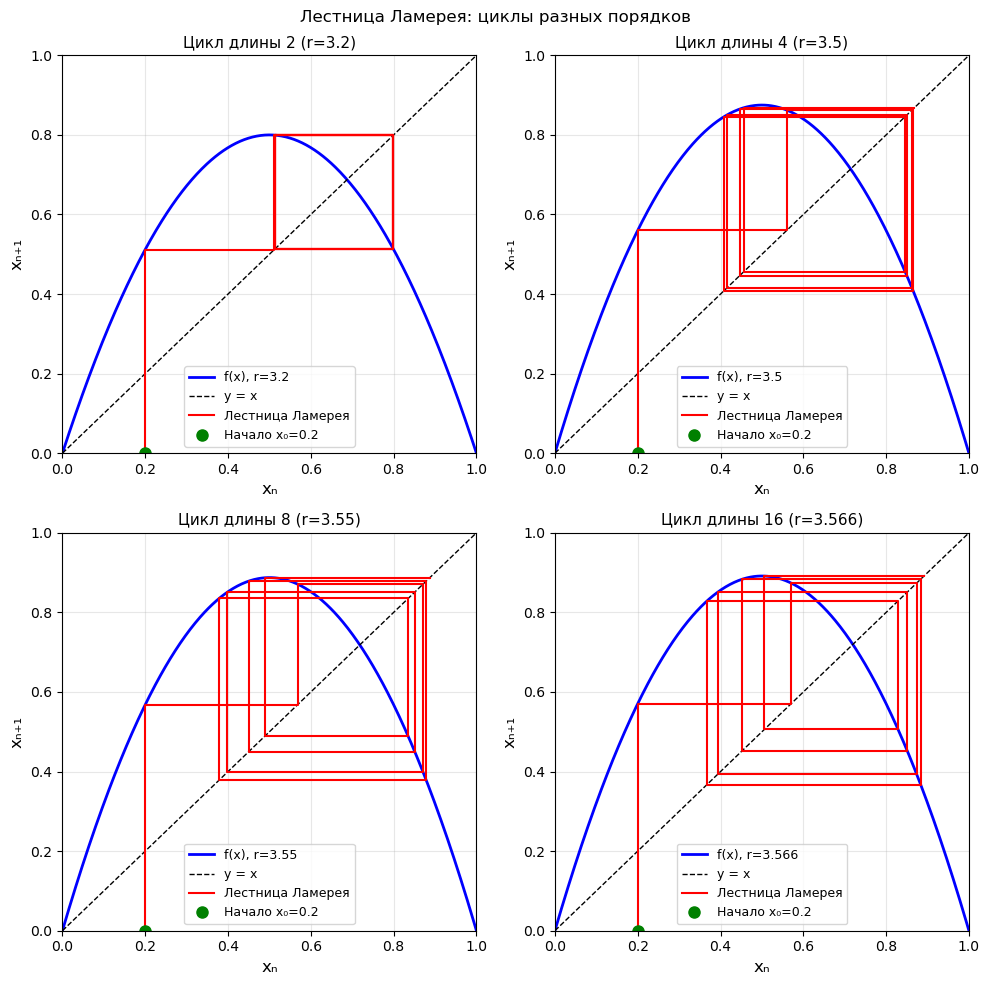

In [180]:
fig1, axes1 = plt.subplots(2, 2, figsize=(10, 10))

ladder_lamerey(axes1[0, 0], f, r=3.2, x0=0.2, n=10, 
             title='Цикл длины 2 (r=3.2)')

ladder_lamerey(axes1[0, 1], f, r=3.5, x0=0.2, n=10,
             title='Цикл длины 4 (r=3.5)')

ladder_lamerey(axes1[1, 0], f, r=3.55, x0=0.2, n=10,
             title='Цикл длины 8 (r=3.55)')

ladder_lamerey(axes1[1, 1], f, r=3.566, x0=0.2, n=10,
             title='Цикл длины 16 (r=3.566)')

plt.suptitle('Лестница Ламерея: циклы разных порядков', fontsize=12)
plt.tight_layout()
plt.show()

## Выводы

### 1. Длина цикла при r ∈ (3; 3.5699456...)
- m = 2, 4, 8, 16, 32, ...
- **Закономерность:** m = 2^k (степени двойки, для большинства r)

### 2. Лестница Ламерея 
- **Цикл длины 2:** лестница колеблется между 2 точками (прямоугольник)
- **Цикл длины 4:** лестница обходит 4 точки
- **Цикл длины 8, 16...:** всё более сложные замкнутые траектории

### 3. Сходства g(x) = r·x·(1-x²) с f(x) = r·x·(1-x)
**Общее:**
- Длина цикла в обоих случаях примерно m = 2^k
- Примерно одинаковое отображение зависимостей r от m

**Различия:**
- Разные диапазоны r 